In [1]:
# AG_ADC1
#plots all mean profiles


In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from numpy import trapz         # for integration
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:


path_les= "/Users/amrapalli/Desktop/DATA_ADC_paper1/LES/"
path_adc= "/Users/amrapalli/Desktop/DATA_ADC_paper1/ADC/"
path_kpp="/Users/amrapalli/Desktop/DATA_ADC_paper1/KPP-CVMix/"
path_ke="/Users/amrapalli/Desktop/DATA_ADC_paper1/K-EPSILON-SG/"



In [4]:
# density calculation from given temp and salinity
def density_eos(t,s):
    alpha=2e-4; beta=8e-4; g=9.81; rho=1026.0
    density= rho*(1.0-alpha*(t-20)+beta*(s-35))
    return density

def bld(t,s,z):
#     ind=np.where((z)>=-70)
#     s=s[ind]; t=t[ind]; z=z[ind]
    density=density_eos(t,s)
    #print(z.shape)
    N2=np.gradient(-density,z,axis=1)
    bld=np.zeros(len(N2[:,0]))
    for t in np.arange(len(N2[:,0])):    
        indx=N2[t,:].argmax()
        bld[t]=z[indx]
    #bld2=np.where(bld>50,nan,bld)
        #print(bld.shape)
    return bld  # depth corresponding to max N2 for all time t


In [5]:
# time step
t = 95  # as KPP and KE have 95 hrs of data stratibg from zero
# range of time for averaging
t1 = t-12

# LES

results_les = {}
#vertical resolutions
#datasets = [1, 2, 5, 10] 
# list comprehension
file_names = [*[f"Cooling{x}" for x in [1, 2, 4, 16]], 
              *[f"Evap{x}" for x in [1, 4]],
              *[f"Strat{x}" for x in [1, 10, 20]],
              *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]

#file_names_reading data
for fn in file_names:
    les= Dataset(path_les+f'{fn}.nc', mode='r')

#         # compute pot
    
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error")
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025
    #print(fn,dtdz,dsdz)
    #compute bld
    results_les[f"bld_{fn}"] = bld(les.variables["temp"][:t,:],
                                   les.variables["salt"][:t,:],
                                    les.variables['zm'][:])
                                    #les.variables["Time"][:t])
                                     #dtdz,
                                    #dsdz)                                         
    les_time= les.variables["Time"][:t]                                       
                                             
#results_les

In [6]:
# ADC

results_adc = {}
#resolutions = [1, 2, 5, 10]
resolutions = [1]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "s1", "s10", "s20", 
              "t1s0", "t1s1", "t1s3", "t1s15"]

for fn in file_names:
    for n in resolutions:
        

        mf = Dataset(path_adc+f'adcTurbulenceArrays_{fn}_{n}m.nc', mode='r')  
        fh = Dataset(path_adc+f'output.0001-01-01_00.00_{n}m.nc', mode='r')

        if "c" in fn:
            dtdz=0.1; dsdz=0.0
        if "e" in fn:
            dtdz=0.0; dsdz=-0.025
        if "s" in fn:
            if "10" in fn:
                dtdz=0.1; dsdz=0.0
            elif "1" in fn:
                dtdz=0.01; dsdz=0.0
            elif "20" in fn:
                dtdz=0.2; dsdz=0.0
            else: 
                print("error")
        if "t1s" in fn:
            dtdz=0.05; dsdz=-0.025
                         
        # compute pot
        results_adc[f"bld_{fn}_{n}m"] = bld(mf.variables["temperature"][:t,0,:],                                                   
                                                  mf.variables["salinity"][:t,0,:],
                                                  fh.variables['zMid'][0,0,:])
                                                   
                                                  #dtdz,
                                                  #dsdz)
        adc_time= les.variables["Time"][:t]                                       
          
        
#results_adc

In [7]:
t=381 #95 hr t1=332
#t=360 #90 hr
#t1=288  #72 hr  % for 24 hr avg
t1=332  #83 hr # for 12 hr avg
#kpp

results_kpp = {}
file_names = [*[f"Cooling{x}" for x in [1, 2, 4, 16]], 
              *[f"Evap{x}" for x in [1, 4]],
              *[f"Strat{x}" for x in [1, 10, 20]],
              *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]
datasets = [1, 10]


for fn in file_names:
    mf1m = Dataset(path_kpp+f'VR1m/{fn}/gotm_out.nc', mode='r')
    #mf10m = Dataset(path_kpp+f'VR10m/{fn}/gotm_out.nc', mode='r')
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error",fn)
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025


    # compute pot
    results_kpp[f"bld_{fn}_1m"] = bld( np.flip(mf1m.variables["temp"][:t,:,0,0],axis=1),
                                       np.flip(mf1m.variables["salt"][:t,:,0,0],axis=1),
                                       np.flip( mf1m.variables['z'][0,:,0,0]))
                                             #dtdz,
                                             #dsdz)
    kpp_time= mf1m.variables["time"][:t]/3600  

In [8]:
t=381 #95 hr
#t=360 #90 hr
#t1=288  #72 hr  % for 24 hr avg
t1=284  #83 hr # for 12 hr avg
#kpp

results_ke = {}
file_names = [*[f"Cooling{x}" for x in [1, 2, 4, 16]], 
              *[f"Evap{x}" for x in [1, 4]],
              *[f"Strat{x}" for x in [1, 10, 20]],
              *[f"T1S{x}" for x in [0, 1, 3, 15]],
             ]
datasets = [1, 10]


for fn in file_names:
    mf1m = Dataset(path_ke+f'VR1m/{fn}/gotm_out.nc', mode='r')
    #mf10m = Dataset(path_ke+f'VR10m/{fn}/gotm_out.nc', mode='r')
    if "Cooling" in fn:
        fn = fn.replace("Cooling", "c")
        dtdz=0.1; dsdz=0.0
    if "Evap" in fn:
        fn = fn.replace("Evap", "e")
        dtdz=0.0; dsdz=-0.025
    if "Strat" in fn:
        fn = fn.replace("Strat", "s")
        if "10" in fn:
            dtdz=0.1; dsdz=0.0
        elif "1" in fn:
            dtdz=0.01; dsdz=0.0
        elif "20" in fn:
            dtdz=0.2; dsdz=0.0
        else: 
            print("error",fn)
    if "T1S" in fn:
        fn = fn.replace("T1S", "t1s")
        dtdz=0.05; dsdz=-0.025


    # compute pot
    results_ke[f"bld_{fn}_1m"] = bld( np.flip(mf1m.variables["temp"][:t,:,0,0],axis=1),
                                       np.flip(mf1m.variables["salt"][:t,:,0,0],axis=1),
                                       np.flip( mf1m.variables['z'][0,:,0,0]))
                                             #dtdz,
                                             #dsdz)
    ke_time= mf1m.variables["time"][:t]/3600  

In [9]:
ke_time[284]-ke_time[380]

-24.0

In [10]:
#relative OSBL error test-les/les over last day
t=95
t0=95-12
relative_errors_osbl_adc = {}

# cooling
for case in [1, 2, 4, 16]:
    numerator = np.nanmean(results_adc[f"bld_c{case}_1m"][t0:t])-np.nanmean(results_les[f"bld_c{case}"][t0:t]) 
    relative_errors_osbl_adc[f"c{case}_1m"] = numerator/np.nanmean(results_les[f"bld_c{case}"][t0:t]) 
        
#  Evap
for case in [1, 4]:
    numerator = np.nanmean(results_adc[f"bld_e{case}_1m"][t0:t])-np.nanmean(results_les[f"bld_e{case}"][t0:t]) 
    relative_errors_osbl_adc[f"e{case}_1m"] = numerator/np.nanmean(results_les[f"bld_e{case}"][t0:t]) 

#  Strat
for case in [1, 10, 20]:
    numerator = np.nanmean(results_adc[f"bld_s{case}_1m"][t0:t])-np.nanmean(results_les[f"bld_s{case}"][t0:t] )
    relative_errors_osbl_adc[f"s{case}_1m"] = numerator/np.nanmean(results_les[f"bld_s{case}"][t0:t] )
        
#  T1S
for case in [0, 1, 3, 15]:
    numerator = np.nanmean(results_adc[f"bld_t1s{case}_1m"][t0:t])-np.nanmean(results_les[f"bld_t1s{case}"][t0:t] )
    relative_errors_osbl_adc[f"t1s{case}_1m"] = numerator/np.nanmean(results_les[f"bld_t1s{case}"][t0:t])

In [11]:
#relative_errors_osbl_adc

In [12]:
relative_errors_osbl_kpp = {}
t=381 #95 hr 
t0=332 # 95-12 hr
#t0=356 #95-6
#t0=284 #95-24
#for les
t1=95
t10=95-12

# cooling
for cases in [1, 2, 4, 16]:
    numerator = np.nanmean(results_kpp[f"bld_c{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_c{cases}"][t10:t1]) 
    relative_errors_osbl_kpp[f"c{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_c{cases}"][t10:t1]) 
        
#  Evap
for cases in [1, 4]:
    numerator = np.nanmean(results_kpp[f"bld_e{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_e{cases}"][t10:t1]) 
    relative_errors_osbl_kpp[f"e{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_e{cases}"][t10:t1]) 

#  Strat
for cases in [1, 10, 20]:
    numerator = np.nanmean(results_kpp[f"bld_s{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_s{cases}"][t10:t1] )
    relative_errors_osbl_kpp[f"s{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_s{cases}"][t10:t1] )
        
#  T1S
for cases in [0, 1, 3, 15]:
    numerator = np.nanmean(results_kpp[f"bld_t1s{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_t1s{cases}"][t10:t1] )
    relative_errors_osbl_kpp[f"t1s{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_t1s{cases}"][t10:t1])

In [13]:
#relative_errors_osbl_kpp

In [14]:
relative_errors_osbl_ke = {}
t=381 #95 hr 
t0=332 # 95-12 hr
#t0=356  # 95-6 hr
#t0=284  # 95-24 hr
#for les
t1=95
t10=95-12

# cooling
for cases in [1, 2, 4, 16]:
    numerator = np.nanmean(results_ke[f"bld_c{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_c{cases}"][t10:t1]) 
    relative_errors_osbl_ke[f"c{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_c{cases}"][t10:t1]) 
        
#  Evap
for cases in [1, 4]:
    numerator = np.nanmean(results_ke[f"bld_e{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_e{cases}"][t10:t1]) 
    relative_errors_osbl_ke[f"e{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_e{cases}"][t10:t1]) 

#  Strat
for cases in [1, 10, 20]:
    numerator = np.nanmean(results_ke[f"bld_s{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_s{cases}"][t10:t1] )
    relative_errors_osbl_ke[f"s{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_s{cases}"][t10:t1] )
        
#  T1S
for cases in [0, 1, 3, 15]:
    numerator = np.nanmean(results_ke[f"bld_t1s{cases}_1m"][t0:t])-np.nanmean(results_les[f"bld_t1s{cases}"][t10:t1] )
    relative_errors_osbl_ke[f"t1s{cases}_1m"] = numerator/np.nanmean(results_les[f"bld_t1s{cases}"][t10:t1])

In [15]:
#relative_errors_osbl_ke

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


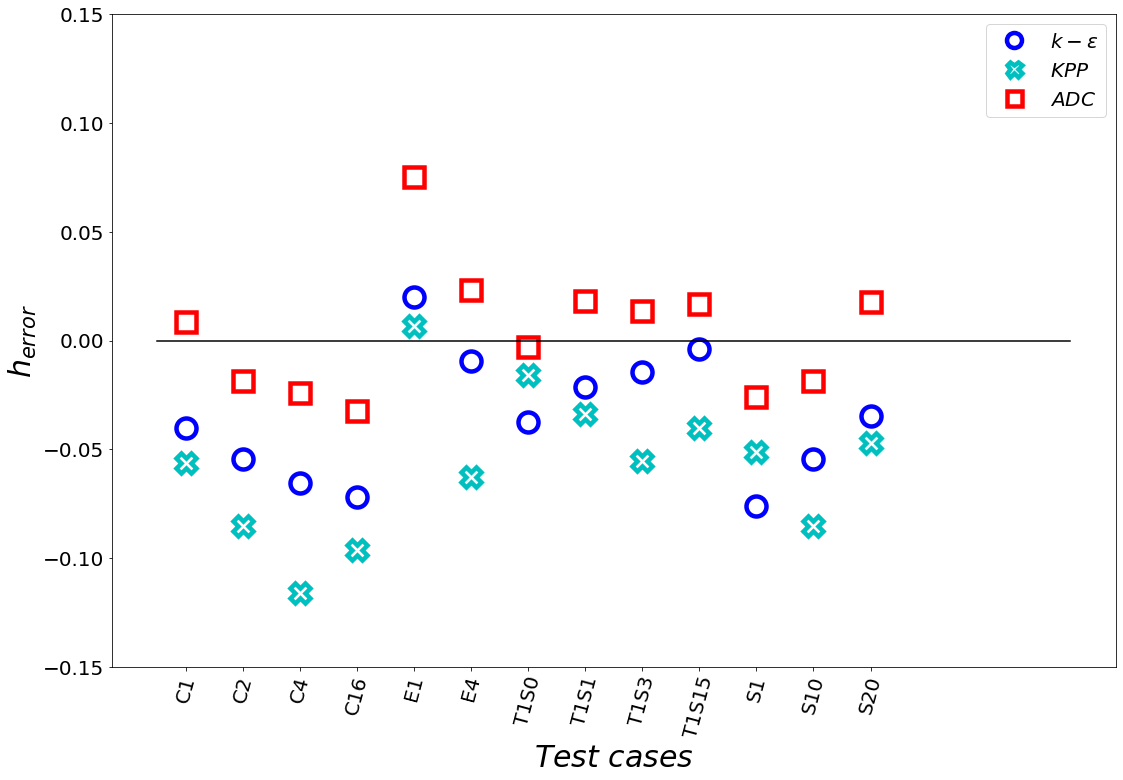

In [16]:
#all data in one plot for relative delta PE

plt.figure(figsize=(18,12))
xaxis=np.arange(2,27*2,4)

datasets = [1]
file_names = ["c1", "c2", "c4", "c16", 
              "e1", "e4", 
              "t1s0", "t1s1", "t1s3", "t1s15",
              "s1", "s10", "s20" ]
line_styles1 = ["ob" ]
line_styles2 = ["Xc" ]
line_styles3 = ["sr" ]

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles1):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_osbl_ke[f"{fn}_{d}m"], ls,markersize=20,markerfacecolor='none', markeredgewidth=4.5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles2):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_osbl_kpp[f"{fn}_{d}m"], ls,markersize=20,markerfacecolor='none', markeredgewidth=4.5)

for fn, x in zip(file_names,xaxis):  
    for d, ls in zip(datasets, line_styles3):
        #print(x, f"{fn}_{d}m")
        plt.plot(x,relative_errors_osbl_adc[f"{fn}_{d}m"], ls,markersize=20,markerfacecolor='none',markeredgewidth=4.5)

plt.plot([0,32*2],[0,0],'-k')
plt.xticks([2,6,10,14,18,22,26,30,34,38,42,46,50], ['C1', 'C2', 'C4','C16','E1','E4','T1S0','T1S1','T1S3','T1S15','S1','S10','S20'],rotation=75,fontsize=28)
plt.ylabel("$ h_{error}$",fontsize=30)
plt.xlabel("$Test$ $cases$",fontsize=30);

#plt.xlim(0,40)


#plt.ylim(-0.03,0.065)
legend_elements2 = [ Line2D([0], [0], marker='o', color='w', label='$k-\epsilon$',markeredgecolor='b',markerfacecolor='none', markersize=15,markeredgewidth=4.5),
                  Line2D([0], [0], marker='X', color='w', label='$KPP$',markeredgecolor='c',markerfacecolor='none', markersize=15,markeredgewidth=4.5),
                Line2D([0], [0], marker='s', color='w', label='$ADC$',markeredgecolor='r',markerfacecolor='none', markersize=15,markeredgewidth=4.5)]

legend3=plt.legend(handles=legend_elements2,fontsize=20)
plt.ylim(-0.15,0.15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("relative_error_osbl_12hravg_10.eps")